In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import os

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
print(os.listdir("../home-credit-default-risk/"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


# Application Dataset

In [3]:
app_train = pd.read_csv('../home-credit-default-risk/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_test = pd.read_csv('../home-credit-default-risk/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocessing

### Missing Values

In [5]:
missing_values = app_train.isna().sum(axis=0).reset_index()
missing_values.columns = ['Variables','Missing Values'] 
missing_values = missing_values[missing_values['Missing Values'] > 0]
missing_values['% of Total Values'] = missing_values['Missing Values']/app_train.shape[0]*100

In [6]:
missing_values.sort_values('% of Total Values', ascending=False)

,Variables,Missing Values,% of Total Values
76,COMMONAREA_MEDI,214865,69.872297
48,COMMONAREA_AVG,214865,69.872297
62,COMMONAREA_MODE,214865,69.872297
84,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
70,NONLIVINGAPARTMENTS_MODE,213514,69.432963
...,...,...,...
42,EXT_SOURCE_2,660,0.214626
10,AMT_GOODS_PRICE,278,0.090403
9,AMT_ANNUITY,12,0.003902
29,CNT_FAM_MEMBERS,2,0.000650


67 out of 122 variables have missing values

### Columns Types

In [7]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [8]:
categorical_variables = app_train.select_dtypes('object').apply(lambda x: len(set(x)), axis = 0)
categorical_variables

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                8
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               19
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             5
HOUSETYPE_MODE                 4
WALLSMATERIAL_MODE             8
EMERGENCYSTATE_MODE            3
dtype: int64

### Encoding Categorical Variables
Label Encoding for variables with 2 categories  
One-Hot Encoding for variables with 2+ categories (avoid any arbitary values)

In [9]:
le = LabelEncoder()

for col in categorical_variables.index:
    if categorical_variables[col] == 2:
        le.fit(app_train[col])
        
        app_train[col] = le.transform(app_train[col])
        app_test[col] = le.transform(app_test[col])

In [10]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape', app_train.shape)
print('Testing Features shape', app_test.shape)

Training Features shape (307511, 243)
Testing Features shape (48744, 239)


### Aligning Training and Testing Data
One-hot encoder creates more data in the training dataset because there are some categories not represented in the testing data  
To remove them, we need to align the dataframes

In [11]:
train_labels = app_train['TARGET']

app_train,app_test = app_train.align(app_test, join = 'inner', axis = 1) # axis = 1: align based on columns

app_train['TARGET'] = train_labels

print('Training Features shape', app_train.shape)
print('Testing Features shape', app_test.shape)

Training Features shape (307511, 240)
Testing Features shape (48744, 239)


## EDA

### Target

In [12]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

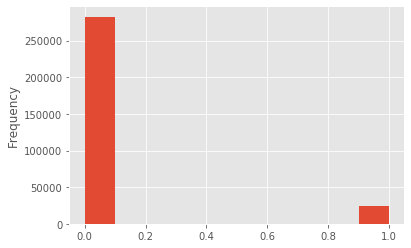

In [13]:
app_train['TARGET'].astype(int).plot.hist()

imbalanced class problem

### Anomalies

In [14]:
(app_train['DAYS_BIRTH']/ -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [15]:
(app_train['DAYS_EMPLOYED']/365).describe()

count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

Max value is about 1000 years & mean value is 174 years!

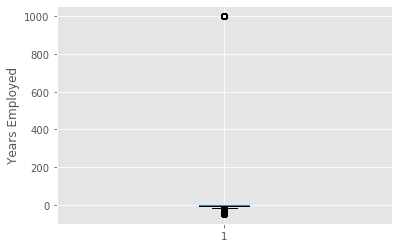

In [16]:
plt.boxplot(app_train['DAYS_EMPLOYED']/365)
plt.ylabel('Years Employed')
plt.show()

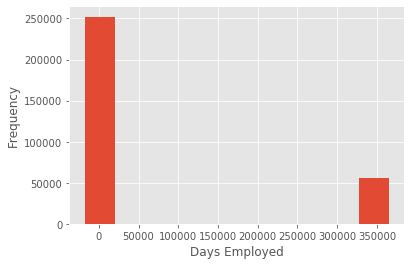

In [17]:
plt.hist(app_train['DAYS_EMPLOYED'])
plt.xlabel('Days Employed')
plt.ylabel('Frequency')
plt.show()

In [18]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non_anomalies default on {:.2f}% of loans'.format(non_anom['TARGET'].mean()*100))
print('The anomalies default on {:.2f}% of loans'.format(anom['TARGET'].mean()*100))
print('There are {:} anomalous days of employment'.format(len(anom)))

The non_anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Shows significant difference.   
1. fill anomalous values with NaN  
2. create a new column indicating wether or not the value was anomalous  

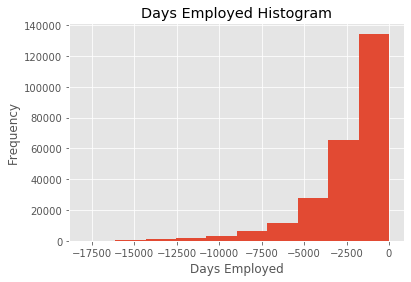

In [19]:
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243

app_train['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employed Histogram')
plt.xlabel('Days Employed')
plt.ylabel('Frequency')
plt.show()

In [20]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243 
app_test['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace = True)
print('There are {:} anomalous values of {:} entries'.format(app_test['DAYS_EMPLOYED_ANOM'].sum(),len(app_test)))

There are 9274 anomalous values of 48744 entries


The other columns with DAYS in the dataframe look to be about what we expect with no obvious outliers.

### Correlations

In [21]:
correlations = app_train.corr()['TARGET'].sort_values()

In [22]:
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n',correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

### Age

In [23]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

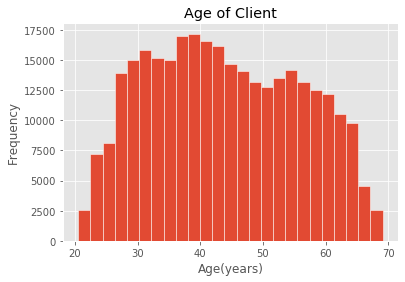

In [24]:
plt.hist(app_train['DAYS_BIRTH']/365, edgecolor = 'w', bins = 25)
plt.title('Age of Client')
plt.xlabel('Age(years)')
plt.ylabel('Frequency')
plt.show()

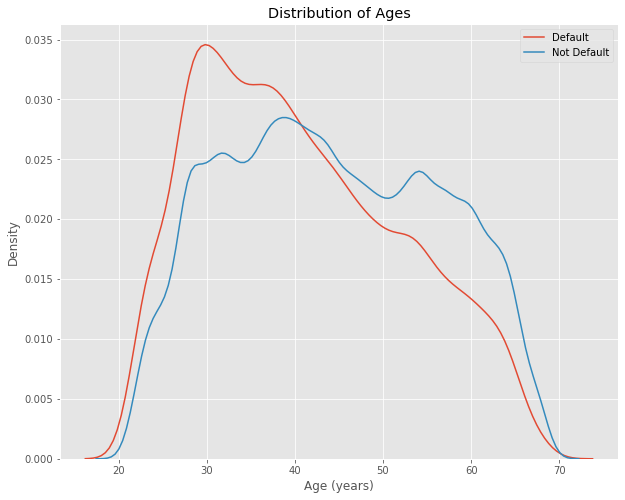

In [25]:
plt.figure(figsize = (10,8))

sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH']/365, label = 'Default')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH']/365, label = 'Not Default')

plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')
plt.show()

In [26]:
age_data = app_train[['TARGET','DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH']/365

# cut the age category into bins of 5 years each
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'],bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [27]:
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


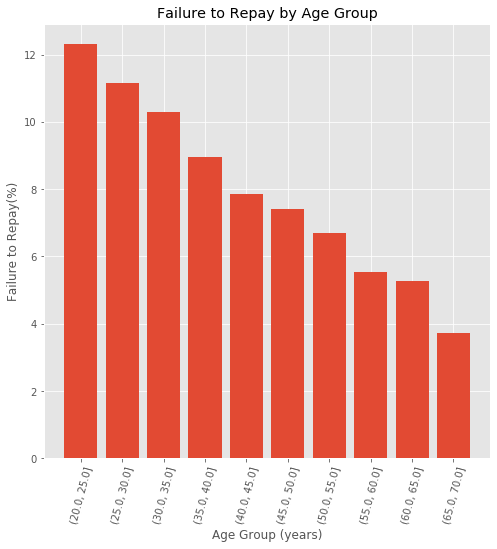

In [28]:
plt.figure(figsize = (8,8))
plt.bar(age_groups.index.astype(str),age_groups['TARGET']*100)

plt.xticks(rotation = 75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay(%)')
plt.title('Failure to Repay by Age Group')
plt.show()

There is a clear trend: younger applicants are more likely to not repay the loan.

In [29]:
ext_data = app_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1, 'Correlation Heatmap')

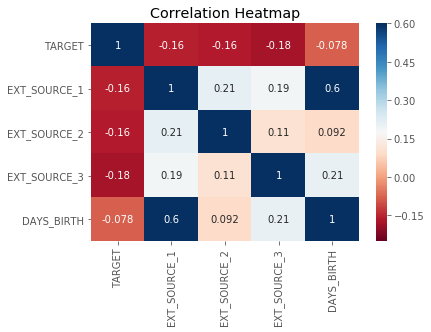

In [30]:
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdBu, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

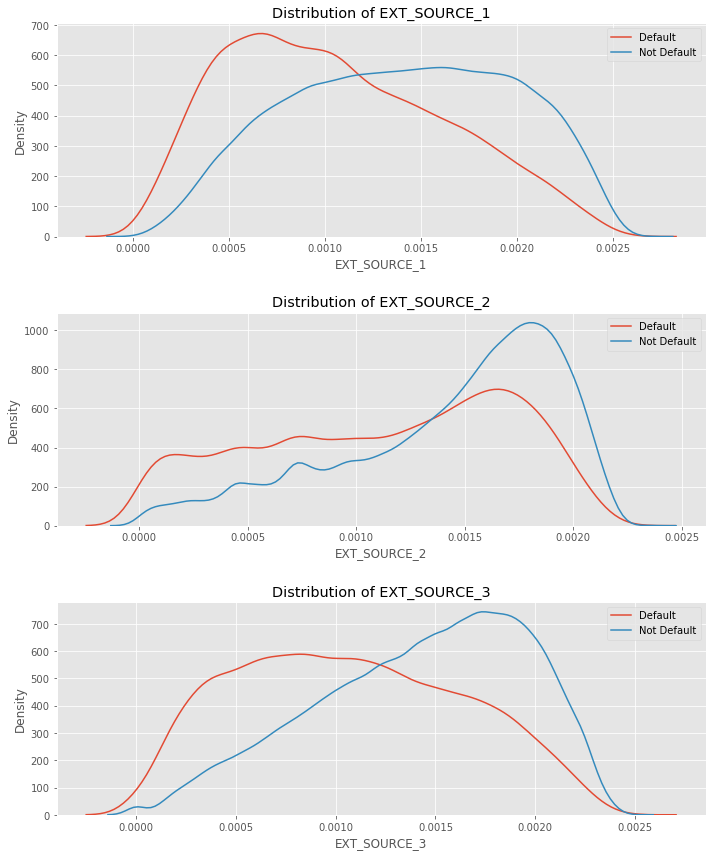

In [31]:
plt.figure(figsize = (10,12))
i = 1
for feature in ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']:
    plt.subplot(3,1,i)
    
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, feature]/365, label = 'Default')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, feature]/365, label = 'Not Default')

    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title('Distribution of {:}'.format(feature))

    i += 1
    
plt.tight_layout(h_pad=2.5)

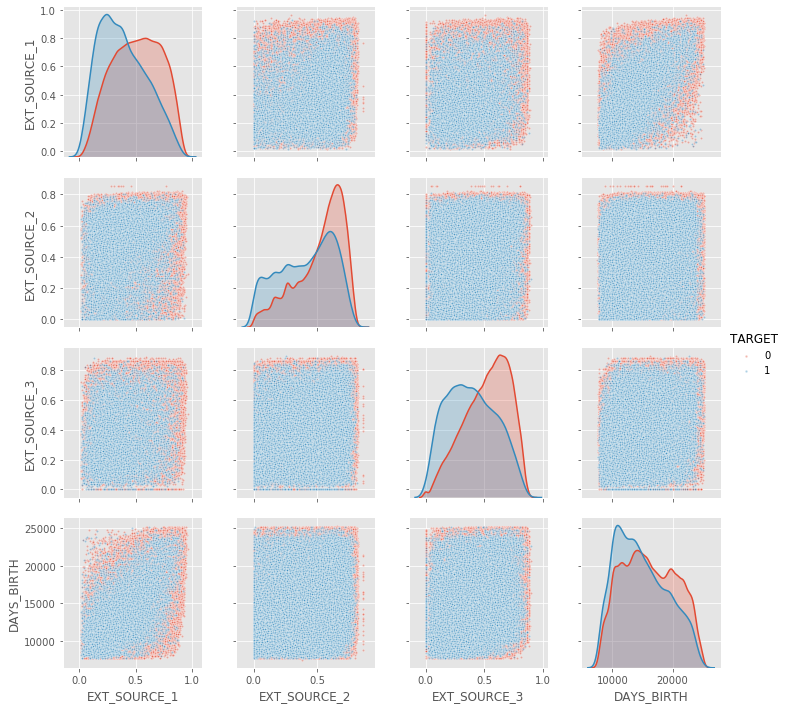

In [32]:
sns.pairplot(app_train,
             vars = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH'],
             diag_kind = 'kde', 
             hue = 'TARGET',
             plot_kws={'alpha':0.4, 's': 6})
plt.show()

## Feature Engineering

### Polynomial Features 

In [33]:
poly_features = app_train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]

In [34]:
# Handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

In [35]:
poly_target = poly_features['TARGET']
poly_features.drop(columns=['TARGET'],inplace = True)

In [36]:
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.fit_transform(poly_features_test)

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree = 3)

poly_transformer.fit(poly_features)

poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [38]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [39]:
poly_features = pd.DataFrame(poly_features,
                            columns = poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']))
poly_features['TARGET'] = poly_target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [40]:
poly_features_test = pd.DataFrame(poly_features_test,
                                  columns = poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']))


In [41]:
#Merger polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, how = 'left', on = 'SK_ID_CURR')

poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, how = 'left', on = 'SK_ID_CURR')

#Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

print('Training data with polynomial features shape: ',app_train_poly.shape)
print('Testing data with polynomial features shape: ',app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:  (48744, 275)


### Extract New Features
+ CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income  
+ ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income  
+ CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due  
+ DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age  

In [42]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

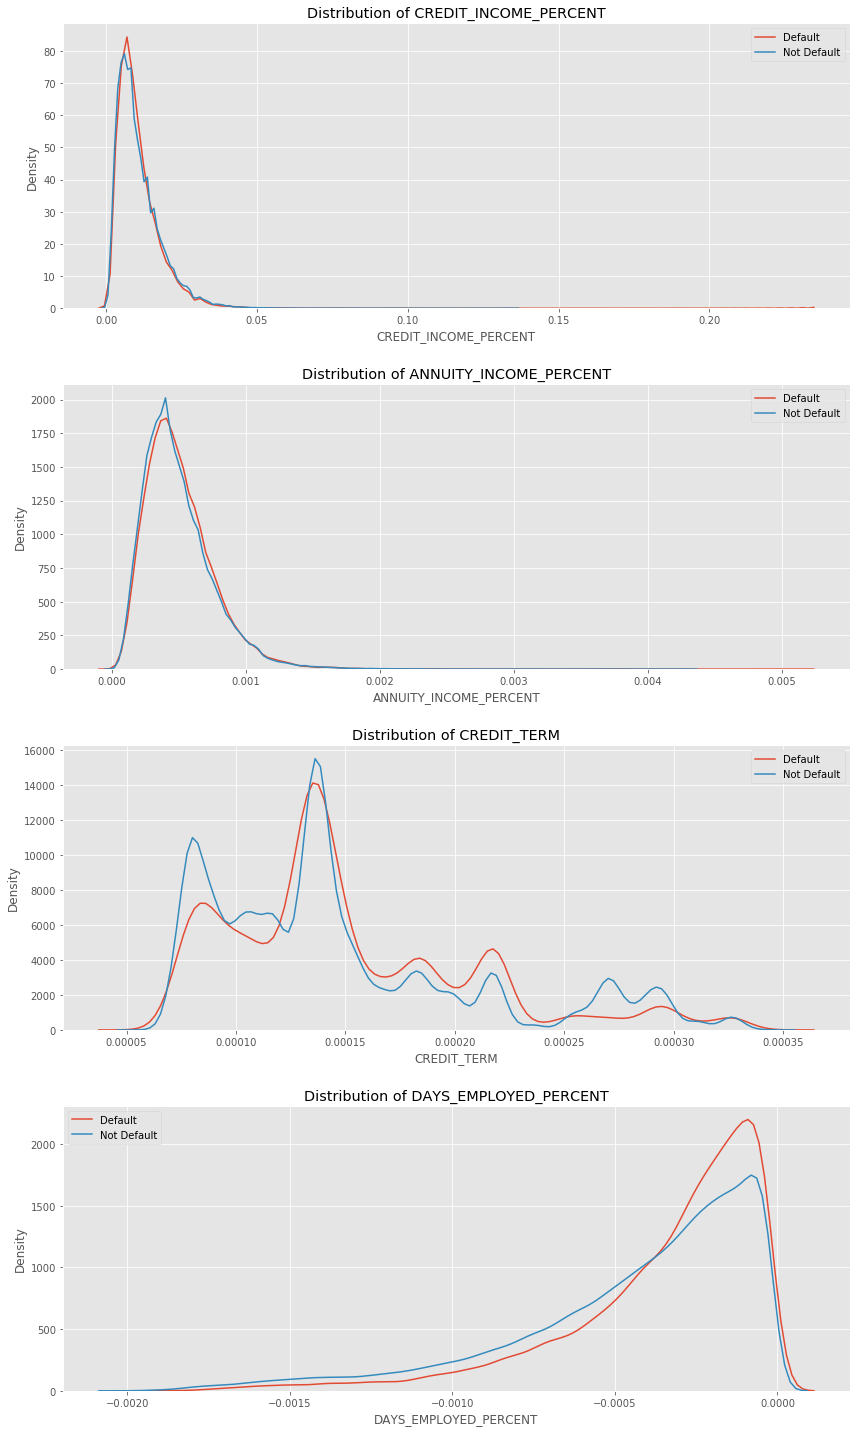

In [43]:
#Visualise new featuers
plt.figure(figsize = (12,20))
i = 1
for feature in ['CREDIT_INCOME_PERCENT','ANNUITY_INCOME_PERCENT','CREDIT_TERM','DAYS_EMPLOYED_PERCENT']:
    plt.subplot(4,1,i)
    
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature]/365, label = 'Default')
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature]/365, label = 'Not Default')

    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title('Distribution of {:}'.format(feature))

    i += 1
    
plt.tight_layout(h_pad=2.5)

Hard to say the effectiveness. Check later.

## Models
### Baseline Model —— Original Features

In [44]:
from sklearn.preprocessing import MinMaxScaler

train = app_train.drop(columns = ['TARGET'])
test = app_test.copy()

features = list(train.columns)

imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(test)

scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ',train.shape)
print('Testing data shape: ',test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


In [56]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(train, train_labels, test_size = 0.2)

### Baseline Model —— Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs',max_iter= 1000, C =0.1)
log_reg.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
print('Accuracy for the training set: ', log_reg.score(X_train,y_train))
print('Accuracy for the validation set: ', log_reg.score(X_val,y_val))

Accuracy for the training set:  0.919624565054795
Accuracy for the validation set:  0.9177438498935011


In [65]:
from sklearn.metrics import roc_auc_score
print('AUC of logistic regression model on validation set: ',roc_auc_score(y_val,log_reg.predict_proba(X_val)[:,1]))

AUC of logistic regression model on validation set:  0.7428804125770045


**AUC of logistic regression model on testing set: 0.671**

### Baseline Model —— Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200, n_jobs = -1)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [66]:
print('Accuracy for the training set: ', rf.score(X_train,y_train))
print('Accuracy for the validation set: ', rf.score(X_val,y_val))
print('AUC of random forest model on validation set: ',roc_auc_score(y_val,rf.predict_proba(X_val)[:,1]))

Accuracy for the training set:  1.0
Accuracy for the validation set:  0.9178251467408094
AUC of random forest model on validation set:  0.716338435287005


### Improved Model (using polynomial features)

In [70]:
app_train_poly

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,EXT_SOURCE_2^3,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0.018181,0.009637,654.152107,0.005108,346.733022,2.353667e+07,0.002707,183.785678,1.247560e+07,8.468590e+11
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0.240927,0.207254,6491.237078,0.178286,5583.975307,1.748916e+08,0.153368,4803.518937,1.504475e+08,4.712058e+12
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0.171798,0.225464,5885.942404,0.295894,7724.580288,2.016572e+08,0.388325,10137.567875,2.646504e+08,6.908939e+12
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0.275185,0.226462,8040.528832,0.186365,6616.894625,2.349331e+08,0.153368,5445.325225,1.933364e+08,6.864416e+12
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0.033616,0.055754,2076.117157,0.092471,3443.335521,1.282190e+08,0.153368,5710.929881,2.126570e+08,7.918677e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,...,0.316702,0.248701,4333.535804,0.195302,3403.064320,5.929720e+07,0.153368,2672.378236,4.656525e+07,8.113830e+11
307507,456252,0,0,1,0,72000.0,269550.0,12001.5,225000.0,0.025164,...,0.001561,0.007202,279.510194,0.033234,1289.874083,5.006225e+07,0.153368,5952.466801,2.310256e+08,8.966503e+12
307508,456253,0,0,1,0,153000.0,677664.0,29979.0,585000.0,0.005002,...,0.153751,0.062812,4295.209004,0.025661,1754.727146,1.199916e+08,0.010483,716.860892,4.902031e+07,3.352102e+12
307509,456254,0,0,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,...,0.135926,0.174750,3162.050698,0.224665,4065.229651,7.355897e+07,0.288836,5226.384299,9.456968e+07,1.711207e+12


In [71]:
from sklearn.preprocessing import StandardScaler

train = app_train_poly.copy()
test = app_test_poly.copy()

poly_features = list(train.columns)

imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(test)

scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ',train.shape)
print('Testing data shape: ',test.shape)

X_train,X_val,y_train,y_val = train_test_split(train, train_labels, test_size = 0.2)

Training data shape:  (307511, 275)
Testing data shape:  (48744, 275)


In [72]:
log_reg = LogisticRegression(solver='lbfgs',max_iter= 1000, C =0.1)
log_reg.fit(X_train,y_train)
print('Accuracy for the training set: ', log_reg.score(X_train,y_train))
print('Accuracy for the validation set: ', log_reg.score(X_val,y_val))
print('AUC of logistic regression model on validation set: ',roc_auc_score(y_val,log_reg.predict_proba(X_val)[:,1]))

Accuracy for the training set:  0.9196774088647524
Accuracy for the validation set:  0.918589337105507
AUC of logistic regression model on validation set:  0.7473735298649455


In [73]:
rf = RandomForestClassifier(n_estimators = 200, n_jobs = -1)
rf.fit(X_train,y_train)
print('Accuracy for the training set: ', rf.score(X_train,y_train))
print('Accuracy for the validation set: ', rf.score(X_val,y_val))
print('AUC of random forest model on validation set: ',roc_auc_score(y_val,rf.predict_proba(X_val)[:,1]))

Accuracy for the training set:  1.0
Accuracy for the validation set:  0.9187031526917386
AUC of random forest model on validation set:  0.7195538982593391


### Improved Model (using ratio features)

In [77]:
train = app_train_domain.drop(columns=['TARGET'])
test = app_test_domain.copy()

domain_features = list(train.columns)

imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(test)

scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ',train.shape)
print('Testing data shape: ',test.shape)

X_train,X_val,y_train,y_val = train_test_split(train, train_labels, test_size = 0.2)

Training data shape:  (307511, 244)
Testing data shape:  (48744, 244)


In [78]:
log_reg = LogisticRegression(solver='lbfgs',max_iter= 1000, C =0.1)
log_reg.fit(X_train,y_train)
print('Accuracy for the training set: ', log_reg.score(X_train,y_train))
print('Accuracy for the validation set: ', log_reg.score(X_val,y_val))
print('AUC of logistic regression model on validation set: ',roc_auc_score(y_val,log_reg.predict_proba(X_val)[:,1]))

Accuracy for the training set:  0.9195026178010471
Accuracy for the validation set:  0.9182316309773507
AUC of logistic regression model on validation set:  0.748564148779231


In [79]:
rf = RandomForestClassifier(n_estimators = 200, n_jobs = -1)
rf.fit(X_train,y_train)
print('Accuracy for the training set: ', rf.score(X_train,y_train))
print('Accuracy for the validation set: ', rf.score(X_val,y_val))
print('AUC of random forest model on validation set: ',roc_auc_score(y_val,rf.predict_proba(X_val)[:,1]))

Accuracy for the training set:  1.0
Accuracy for the validation set:  0.918264149716274
AUC of random forest model on validation set:  0.7246088922837775


### Improved Model (using all new features)

In [93]:
new_poly_features = list(set(poly_features) - set(features)) + ['SK_ID_CURR']
new_domain_features = list(set(domain_features) - set(features)) + ['SK_ID_CURR']

In [100]:
all_features_train = app_train_poly.merge(app_train_domain[new_domain_features], how = 'left', on = 'SK_ID_CURR')
all_features_test = app_test_poly.merge(app_test_domain[new_domain_features], how = 'left', on = 'SK_ID_CURR')

In [105]:
train = all_features_train.drop(columns=['SK_ID_CURR'])
test = all_features_test.drop(columns=['SK_ID_CURR'])

all_features = list(train.columns)

imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(test)

scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ',train.shape)
print('Testing data shape: ',test.shape)

X_train,X_val,y_train,y_val = train_test_split(train, train_labels, test_size = 0.2)

Training data shape:  (307511, 278)
Testing data shape:  (48744, 278)


In [102]:
log_reg = LogisticRegression(solver='lbfgs',max_iter= 1000, C =0.1)
log_reg.fit(X_train,y_train)
print('Accuracy for the training set: ', log_reg.score(X_train,y_train))
print('Accuracy for the validation set: ', log_reg.score(X_val,y_val))
print('AUC of logistic regression model on validation set: ',roc_auc_score(y_val,log_reg.predict_proba(X_val)[:,1]))

Accuracy for the training set:  0.9197587070339176
Accuracy for the validation set:  0.9183291871941206
AUC of logistic regression model on validation set:  0.7465111550823372


In [103]:
rf = RandomForestClassifier(n_estimators = 200, n_jobs = -1)
rf.fit(X_train,y_train)
print('Accuracy for the training set: ', rf.score(X_train,y_train))
print('Accuracy for the validation set: ', rf.score(X_val,y_val))
print('AUC of random forest model on validation set: ',roc_auc_score(y_val,rf.predict_proba(X_val)[:,1]))

Accuracy for the training set:  1.0
Accuracy for the validation set:  0.9183291871941206
AUC of random forest model on validation set:  0.711062567539353


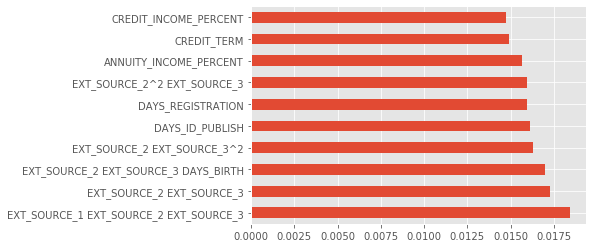

In [110]:
pd.Series(rf.feature_importances_, index = all_features).sort_values(ascending = False)[:10].plot.barh()

In [113]:
from lightgbm import LGBMClassifier
lbg = LGBMClassifier(n_estimators = 2000, n_jobs = -1, class_weight = 'balanced')
lbg.fit(X_train,y_train)
print('Accuracy for the training set: ', lbg.score(X_train,y_train))
print('Accuracy for the validation set: ', lbg.score(X_val,y_val))
print('AUC of lighGBM model on validation set: ',roc_auc_score(y_val,lbg.predict_proba(X_val)[:,1]))

Accuracy for the training set:  0.9048445579005561
Accuracy for the validation set:  0.8295855486724225
AUC of lighGBM model on validation set:  0.7399914364991697


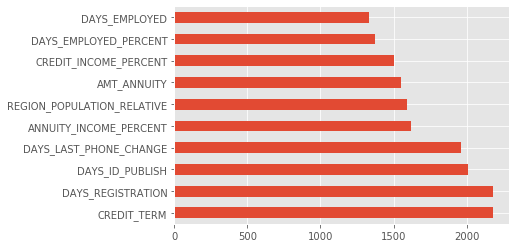

In [115]:
pd.Series(lbg.feature_importances_, index = all_features).sort_values(ascending = False)[:10].plot.barh()

Seems no clear improvement to the result

In [142]:
train = app_train_domain.drop(columns=['TARGET','SK_ID_CURR'])
test = app_test_domain.drop(columns = ['SK_ID_CURR'])

domain_features = list(train.columns)

imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(test)

scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ',train.shape)
print('Testing data shape: ',test.shape)

X_train,X_val,y_train,y_val = train_test_split(train, train_labels, test_size = 0.2)

Training data shape:  (307511, 243)
Testing data shape:  (48744, 243)


In [149]:
lbg = LGBMClassifier(n_estimators=10000, objective = 'binary', 
                     class_weight = 'balanced', learning_rate = 0.05, 
                     reg_alpha = 0.1, reg_lambda = 0.1, 
                     subsample = 0.8, n_jobs = -1, random_state = 50)
lbg.fit(X_train, y_train, eval_metric = 'auc',
        eval_set = [(X_val, y_val), (X_train, y_train)],
        eval_names = ['valid', 'train'],
        early_stopping_rounds = 100, verbose = 200)
print('Accuracy for the training set: ', lbg.score(X_train,y_train))
print('Accuracy for the validation set: ', lbg.score(X_val,y_val))
print('AUC of lighGBM model on validation set: ',roc_auc_score(y_val,lbg.predict_proba(X_val)[:,1]))

Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.802109	train's binary_logloss: 0.544085	valid's auc: 0.762837	valid's binary_logloss: 0.559844
Early stopping, best iteration is:
[272]	train's auc: 0.813994	train's binary_logloss: 0.53214	valid's auc: 0.763416	valid's binary_logloss: 0.552611
Accuracy for the training set:  0.7277324314656434
Accuracy for the validation set:  0.716778043347479
AUC of lighGBM model on validation set:  0.7634158311907563


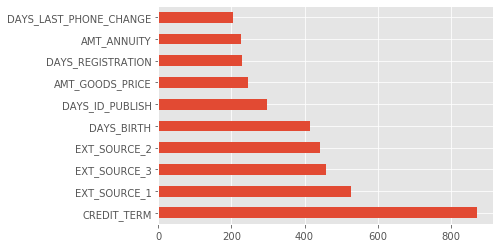

In [151]:
pd.Series(lbg.feature_importances_, index = domain_features).sort_values(ascending = False)[:10].plot.barh()

In [152]:
submission = pd.DataFrame({'SK_ID_CURR': app_test['SK_ID_CURR'], 'TARGET': lbg.predict_proba(test)[:,1]})
submission

,SK_ID_CURR,TARGET
0,100001,0.179635
1,100005,0.424727
2,100013,0.151030
3,100028,0.228290
4,100038,0.591281
...,...,...
48739,456221,0.237415
48740,456222,0.485242
48741,456223,0.144971
48742,456224,0.193653


In [153]:
submission.to_csv('home_credit_risk_lgbm.csv')